# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
# Load Data 
dataset = pd.read_csv("compresive_strength_concrete.csv")
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [5]:
# Check Missing Values 
dataset.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [6]:
dataset = dataset.astype("float32")

dataset.dtypes

Cement (component 1)(kg in a m^3 mixture)                float32
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float32
Fly Ash (component 3)(kg in a m^3 mixture)               float32
Water  (component 4)(kg in a m^3 mixture)                float32
Superplasticizer (component 5)(kg in a m^3 mixture)      float32
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float32
Fine Aggregate (component 7)(kg in a m^3 mixture)        float32
Age (day)                                                float32
Concrete compressive strength(MPa, megapascals)          float32
dtype: object

In [12]:
dataset.shape

(1030, 9)

In [17]:
# Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
train_size = int(dataset.shape[0] * 0.5)
test_size = int(dataset.shape[0] * 0.3) + train_size
print(train_size,test_size)

515 824


In [19]:
y = np.asarray(dataset[["Concrete compressive strength(MPa, megapascals) "]])
pd.DataFrame(y)

,0
0,79.989998
1,61.889999
2,40.270000
3,41.049999
4,44.299999
5,47.029999
6,43.700001
7,36.450001
8,45.849998
9,39.290001


In [20]:
x = np.asarray(dataset.drop(["Concrete compressive strength(MPa, megapascals) "], axis=1))
pd.DataFrame(x)

,0,1,2,3,4,5,6,7
0,540.000000,0.000000,0.000000,162.000000,2.500000,1040.000000,676.000000,28.0
1,540.000000,0.000000,0.000000,162.000000,2.500000,1055.000000,676.000000,28.0
2,332.500000,142.500000,0.000000,228.000000,0.000000,932.000000,594.000000,270.0
3,332.500000,142.500000,0.000000,228.000000,0.000000,932.000000,594.000000,365.0
4,198.600006,132.399994,0.000000,192.000000,0.000000,978.400024,825.500000,360.0
5,266.000000,114.000000,0.000000,228.000000,0.000000,932.000000,670.000000,90.0
6,380.000000,95.000000,0.000000,228.000000,0.000000,932.000000,594.000000,365.0
7,380.000000,95.000000,0.000000,228.000000,0.000000,932.000000,594.000000,28.0
8,266.000000,114.000000,0.000000,228.000000,0.000000,932.000000,670.000000,28.0
9,475.000000,0.000000,0.000000,228.000000,0.000000,932.000000,594.000000,28.0


In [38]:
y_train, y_test, y_validation = y[:train_size], y[train_size:test_size], y[test_size:]
x_train, x_test, x_validation = x[:train_size], x[train_size:test_size], x[test_size:]
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7
0,540.000000,0.000000,0.000000,162.000000,2.500000,1040.000000,676.000000,28.0
1,540.000000,0.000000,0.000000,162.000000,2.500000,1055.000000,676.000000,28.0
2,332.500000,142.500000,0.000000,228.000000,0.000000,932.000000,594.000000,270.0
3,332.500000,142.500000,0.000000,228.000000,0.000000,932.000000,594.000000,365.0
4,198.600006,132.399994,0.000000,192.000000,0.000000,978.400024,825.500000,360.0
5,266.000000,114.000000,0.000000,228.000000,0.000000,932.000000,670.000000,90.0
6,380.000000,95.000000,0.000000,228.000000,0.000000,932.000000,594.000000,365.0
7,380.000000,95.000000,0.000000,228.000000,0.000000,932.000000,594.000000,28.0
8,266.000000,114.000000,0.000000,228.000000,0.000000,932.000000,670.000000,28.0
9,475.000000,0.000000,0.000000,228.000000,0.000000,932.000000,594.000000,28.0


In [60]:
input_shape = x_train[0].shape
input_shape

(8,)

In [47]:
# Standardized the Input Variables
mean = x_train.mean()


In [49]:
x_train -= mean
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7
0,540.000061,0.000061,0.000061,162.000061,2.500061,1040.000000,676.000061,28.000061
1,540.000061,0.000061,0.000061,162.000061,2.500061,1055.000000,676.000061,28.000061
2,332.500061,142.500061,0.000061,228.000061,0.000061,932.000061,594.000061,270.000061
3,332.500061,142.500061,0.000061,228.000061,0.000061,932.000061,594.000061,365.000061
4,198.600067,132.400055,0.000061,192.000061,0.000061,978.400085,825.500061,360.000061
5,266.000061,114.000061,0.000061,228.000061,0.000061,932.000061,670.000061,90.000061
6,380.000061,95.000061,0.000061,228.000061,0.000061,932.000061,594.000061,365.000061
7,380.000061,95.000061,0.000061,228.000061,0.000061,932.000061,594.000061,28.000061
8,266.000061,114.000061,0.000061,228.000061,0.000061,932.000061,670.000061,28.000061
9,475.000061,0.000061,0.000061,228.000061,0.000061,932.000061,594.000061,28.000061


In [51]:
std  = x_train.std()
std

353.80447

In [53]:
x_train /= std
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7
0,0.004314,4.875885e-10,4.875885e-10,0.001294,1.997211e-05,0.008308,0.005400,0.000224
1,0.004314,4.875885e-10,4.875885e-10,0.001294,1.997211e-05,0.008428,0.005400,0.000224
2,0.002656,1.138383e-03,4.875885e-10,0.001821,4.875885e-10,0.007445,0.004745,0.002157
3,0.002656,1.138383e-03,4.875885e-10,0.001821,4.875885e-10,0.007445,0.004745,0.002916
4,0.001587,1.057698e-03,4.875885e-10,0.001534,4.875885e-10,0.007816,0.006595,0.002876
5,0.002125,9.107065e-04,4.875885e-10,0.001821,4.875885e-10,0.007445,0.005352,0.000719
6,0.003036,7.589222e-04,4.875885e-10,0.001821,4.875885e-10,0.007445,0.004745,0.002916
7,0.003036,7.589222e-04,4.875885e-10,0.001821,4.875885e-10,0.007445,0.004745,0.000224
8,0.002125,9.107065e-04,4.875885e-10,0.001821,4.875885e-10,0.007445,0.005352,0.000224
9,0.003795,4.875885e-10,4.875885e-10,0.001821,4.875885e-10,0.007445,0.004745,0.000224


In [54]:




x_test -= mean
x_test /= std
x_validation -= mean
x_validation /= std

In [72]:
# Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(10, input_shape=input_shape, activation="relu"))
    model.add(layers.Dense(8, activation="relu"))
    model.add(layers.Dense(6, activation="relu"))
    model.add(layers.Dense(1, activation="relu"))
    
    #Compilation Step
    model.compile(metrics=["mae"], loss="mse", optimizer="rmsprop")
    
    return model
model = build_model()

In [73]:
model = build_model()
#training the model 
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=100, batch_size=5)

Epoch 1/100
103/103 [==============================] - 1s 2ms/step - loss: 2007.9467 - mae: 41.6022 - val_loss: 446.0750 - val_mae: 17.7450
Epoch 2/100
103/103 [==============================] - 0s 2ms/step - loss: 2006.7307 - mae: 41.0911 - val_loss: 382.3542 - val_mae: 16.7917
Epoch 3/100
103/103 [==============================] - 0s 2ms/step - loss: 1659.2951 - mae: 37.1157 - val_loss: 6012.6816 - val_mae: 76.5604
Epoch 4/100
103/103 [==============================] - 0s 2ms/step - loss: 1285.6082 - mae: 31.7412 - val_loss: 32114.2520 - val_mae: 178.7882
Epoch 5/100
103/103 [==============================] - 0s 2ms/step - loss: 820.9711 - mae: 23.7753 - val_loss: 106628.8438 - val_mae: 326.3132
Epoch 6/100
103/103 [==============================] - 0s 2ms/step - loss: 387.2535 - mae: 15.7022 - val_loss: 215467.7500 - val_mae: 464.0248
Epoch 7/100
103/103 [==============================] - 0s 2ms/step - loss: 268.9222 - mae: 13.0740 - val_loss: 248033.6562 - val_mae: 497.8864
Epoch 8

103/103 [==============================] - 0s 2ms/step - loss: 287.5851 - mae: 13.9195 - val_loss: 617796.5625 - val_mae: 784.3551
Epoch 59/100
103/103 [==============================] - 0s 1ms/step - loss: 294.5218 - mae: 13.9314 - val_loss: 617036.2500 - val_mae: 783.8256
Epoch 60/100
103/103 [==============================] - 0s 1ms/step - loss: 289.9139 - mae: 13.9220 - val_loss: 621655.5000 - val_mae: 786.7120
Epoch 61/100
103/103 [==============================] - 0s 1ms/step - loss: 261.2463 - mae: 13.1125 - val_loss: 651258.4375 - val_mae: 805.1840
Epoch 62/100
103/103 [==============================] - 0s 2ms/step - loss: 273.8758 - mae: 13.5109 - val_loss: 648246.0625 - val_mae: 803.2753
Epoch 63/100
103/103 [==============================] - 0s 1ms/step - loss: 294.6965 - mae: 14.0098 - val_loss: 667132.6875 - val_mae: 814.8523
Epoch 64/100
103/103 [==============================] - 0s 1ms/step - loss: 264.9704 - mae: 13.2563 - val_loss: 645614.0625 - val_mae: 801.5453
Epoch

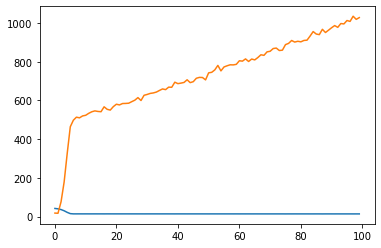

In [74]:
import matplotlib.pyplot as plt

plt.plot(range(100), history.history["mae"])
plt.plot(range(100), history.history["val_mae"])
plt.show()

In [70]:
prediction = model.evaluate(x_test, y_test)
print(prediction)


10/10 [==============================] - 0s 2ms/step - loss: 396708.4062 - mae: 457.2868
[396708.40625, 457.28680419921875]


In [71]:
# Prediction
model.predict([[ 0.19933844, -0.85647184, -0.8467326 ,  1.003676  , -1.0386382 ,
        0.0139037 ,  0.54155266, -0.27959728]])

array([[ 0.      ,  0.      , 13.403662,  0.      , 13.041514, 13.352804]],
      dtype=float32)